# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |


## Configuration and procedure to run code

### Project and environment setup

1. Move to project directory "PROG8431" where you have cloned the project
2. Create virtual environment with name **"venvPROG8431"**
    - Make sure ```python --version``` is set to **12.3.6** in your system
    - ```python -m venv venvPROG8431```
3. Activate environment
    - ```.\venvPROG8431\Scripts\Activate.ps1```
    - In case you are using visual studio code, Choose the environment from menu as active environment
4. Install packages mentioned in **"requirements.txt"**
    - ```pip install -r requirements.txt```
5. Select **"venvPROG8431"** environment in your IDE
6. Create folder named **"Dataset"** in your project directory
7. Move all files downloaded from Kaggle dataset in the "Dataset" Directory
8. Open "Workshop1.ipynb" and run first program snippet. 
9. It should display top 5 rows from file "RAW_recipe.csv"


### Update Requirements.txt file once installing new packages

```pip freeze > requirements.txt```

### Import Packages

In [48]:
import pandas as pd
from scipy.stats import shapiro
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


### Read data from source : RAW_recipe.csv

In [49]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")

    # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for name \r\n")
        if self.data is not None:
            counts = self.data["name"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["Recepe Name", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

    
if __name__ == "__main__":

    # Create an instance of the DataAnalytics class
    recepeData = RawRecipe()
    
    # Load data
    recepeData.load_data()

    # Check for missing values
    recepeData.check_null_values()

    recepeData.check_duplicate_values()

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 

---> STEP 2 : Null Check for data 

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

---> STEP 3 : Duplicate data Check for name 

                             Recepe Name  Count
0          cream cheese banana nut bread      3
1                cranberry orange relish      3
2          banana chocolate chip muffins      3
3             brown sugar glazed carrots      3
4     gluten free chocolate chip cookies      3
...                                  ...    ...
1425     zucchini chocolate chip muffins      2
1426               zucchini cilantro dip      2
1427                 zucchini lime bread      2
1428                  zucchini 

### Data Cleanup

1. Dataset contains "null" values in only "description" column which is not mandatory data which affects our analysis
2. There is 1 null value in "name" column that we will be eliminating while performing other operations
3. Duplicate check does not apply in Minutes, number of steps, nunber of ingrediants and ingrediants columns in dataset because it does not give any valuable insights
4. 1429 recepe names were repeated in dataset. This means we have multiple recepe to prepare one item.


### QQ Normal Plot


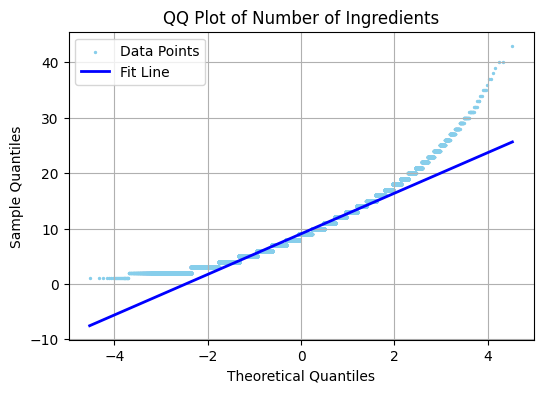

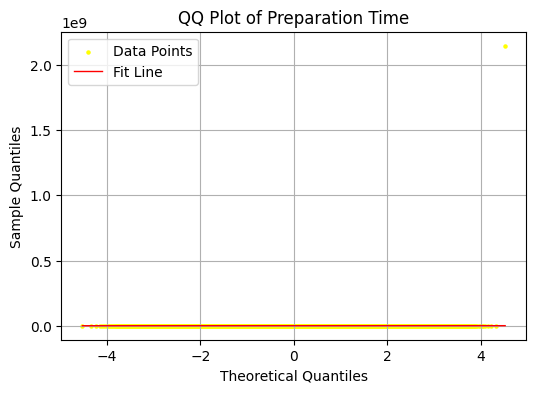

In [50]:
ingrediant_count = recepeData.data["n_ingredients"]  # Replace with your column
minutes_count = recepeData.data["minutes"]

def create_qq_plot(data, title, line_color, line_width, point_color, point_size):
    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist="norm")
    plt.figure(figsize=(6, 4))
    plt.scatter(osm, osr, color=point_color, s=point_size, label='Data Points')  # Plot the data points
    plt.plot(osm, slope * osm + intercept, color=line_color, lw=line_width, label='Fit Line')  # Plot the line
    plt.title(f'QQ Plot of {title}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.legend()
    plt.grid(True)
    plt.show()

# QQ Plot for Number of Ingredients
create_qq_plot(ingrediant_count, 'Number of Ingredients',"blue",2,"skyblue",2)

# QQ Plot for Preparation Time
create_qq_plot(minutes_count, 'Preparation Time',"red",1,"yellow",5)

#### Summary

1. Number of ingrediants : indicates middle portion of the data is is following normal destribution whereas recipes with more ingrediants creating skew 
2. Preperation time : The plot shows that data for prepation time is normaly destributed as data points are overlapping the fitline.

### Z-Score

In [51]:
Zscore_steps = shapiro(recepeData.data['n_steps'])
print(f"Z-Score for the steps\n ",Zscore_steps)

Z-Score for the steps
  ShapiroResult(statistic=np.float64(0.8698185219400804), pvalue=np.float64(7.208515052978634e-138))


d:\Conestoga\PROG8431-DAM\PROG8431\venvPROG8431\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 231637.
  res = hypotest_fun_out(*samples, **kwds)


#### Summary
The Z-score expresses the number of standard deviations (n_steps) that a particular number of steps deviates from the dataset mean. To determine if n_steps is above or below average for the dataset, subtract the mean from n_steps and divide the result by the standard deviation.

### T-score

In [52]:
sample_mean = recepeData.data['n_steps'].mean()
sample_std = recepeData.data['n_steps'].std()
n = len(recepeData.data['n_steps'])

# Specify the population mean (change as necessary)
population_mean = 0  # Update this to your population mean

# Calculate the t-score
t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(n))

print(f"T-score for {'n_steps'}: {t_score}")

T-score for n_steps: 783.9709415505705


#### Summary
A statistical tool called the t-score can be used to calculate the standard deviation of the difference between a sample mean and the population mean. It is utilized in hypothesis testing, particularly in cases when the sample size is small or the population standard deviation is unknown, to ascertain whether the differences between groups are significant.

### Shapiro-Wilk Normality Test

In [53]:
# Load your dataset (replace with your own data)
dataset = np.array([23, 11, 18, 25, 9, 26, 17, 20, 16, 14, np.nan, np.inf])

# Clean the dataset by removing NaN and infinite values
cleaned_dataset = dataset[~np.isnan(dataset) & ~np.isinf(dataset)]

if len(cleaned_dataset) < 3:
    print("The dataset is too small for the Shapiro-Wilk test after cleaning.")
else:
    # Perform the Shapiro-Wilk Normality Test
    stat, p = shapiro(cleaned_dataset)

    print("Shapiro-Wilk Test Statistic:", stat)
    print("p-value:", p)

    if p > 0.05:
        print("The dataset appears to be normally distributed.")
    else:
        print("The dataset does not appear to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9658002720462433
p-value: 0.8494129678647864
The dataset appears to be normally distributed.


#### Summary

The p-value of 0.8494 obtained from the Shapiro-Wilk test is greater than the significance level of 0.05. This implies that the normality null hypothesis cannot be disproved, suggesting that the dataset has a normal distribution. Proper for parametric statistical analysis, the high p-value validates the assumption of normality.